# SK-Learn
Bekannte Bibliothek für DS-Projekte in Python. Hiermit lassen sich Bereiche des
- Data-Preprocessings
- Modellierung

durchführen.

SKlearnt strebt danach den gleichen Aufbau der unterschiedlichen Algorithmen mitzugeben => ausgehend von einem Estimator(den wir die Namenszuweisung "model" geben) gilt folgendes:

* model.fit() #=> algorithmus wird auf Trainingsdaten gefittet
* bei SL = model.fit(X,y)
* bei USL = model.fit(X)

**Funktion ausschließlich für Supervised**
* model.predict(X-Neu)
* model.score(X-Neu) # => grad bei Klassifizierung

**Nur Un-Supervised**
    * model.predict() # => Cluster
    * model.transform() # => Ausgehend von unsupervised Model neue Daten als Grundlage
    * model.fit:predict() # => bei manchen Estimatoren => Ziel effizienter ANppasunng und Transformation mit selben Input





## Installation

In [1]:
#!pip install sklearn

## BSP-Verwendung-Konzeptionell

![image.png](./imgs/sklearn1.png)
![image.png](./imgs/sklearn2.png)
![image.png](./imgs/sklearn3.png)

# Vorgehen

1. Beschaffen der Daten
2. Aufbereiten der Daten
2. Modelieren
hier wird in der Grundlage keine tatsächliche Implementierung geliefert => daher habe ich hier lediglich die Slides Eingefügt.
Der Teil ist easy sobal die Daten in einem Shape sind, der "i.O." ist. In diesem Teil muss man eben ein Verständniss des Algorithmus im Allgemeinen haben, besonders wenn es darum geht einen Algorithmus "performant" zu implementieren. (Bspw was kann parallel // muss sequentiell laufen).

Konkret geht es hier um die implementierung je nach Anwendungsfall(Regression/ Klassifikation/)
3. Predicten

## Trainieren auf Trainingsdaten


# Hilfestellung bei der Algorithmusauswahl im SK-Learn Kosmos
[Link](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
![SK-CheatSheet](https://scikit-learn.org/stable/_static/ml_map.png)


# Konkrete Implementierungs-Templates

## Weiteres Bsp

für die weitere Erklärung SK-Learn arbeite ich mit einer "Clean" Version vom California-Housing. Dieses Daten kommen in diesem konkreten Fall aus dem Udemy Kurs von Rene Brunner (Deep-Learning).

In [2]:
import pandas as pd
dfCal = pd.read_csv('./data/cal_housing_clean.csv',delimiter=',',encoding='utf-8')
dfCal.columns # y = medianHouseValue || X = alles ohne y

Index(['housingMedianAge', 'totalRooms', 'totalBedrooms', 'population',
       'households', 'medianIncome', 'medianHouseValue'],
      dtype='object')

## Train/Test-Split
Innerhalb von DS Projekten werden aus der Grundgesamtheit der zur Verfügung stehenen Daten häufig unterschiedliche "Sub-Datensätze" benötigt.

In [6]:
from sklearn.model_selection import train_test_split

# Best-Practice in horizontaler & VertikalerSpaltung: 
X_train, X_test, y_train, y_test = train_test_split(dfCal.drop('medianHouseValue',axis=1), 
                                                    dfCal['medianHouseValue'], test_size=0.30, 
                                                    random_state=101)

**Side-Info**<br>
hier eine  etwas unelegantere Versionen den Train & Test-Split hinzubiegen. Das ist jedoch der Standard in vielen Tutorials bzw Vo-Einheiten

## Skalieren

### Min-Max-Scaler

#### Extended
um das Vorgehen zu verstehen

In [16]:
# Kopie für die Extended Version
xtrainC = X_train.copy()
#print(type(xtrainC))
#print(len(xtrainC))
#print(xtrainC.head())

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # Robust / standard
scaler.fit(xtrainC)
# print(scaler) # => Objekt

MinMaxScaler(copy=True, feature_range=(0, 1))


In [13]:
# Transform
xtrainC = pd.DataFrame(data=scaler.transform(xtrainC),columns = xtrainC.columns,index=xtrainC.index)

In [14]:
xtrainC.head() # => Transfomriertes DF, alles im Featrue-Range 0- 1


,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome
6761,0.352941,0.069688,0.117163,0.048769,0.115442,0.142508
3010,0.607843,0.011242,0.015673,0.008367,0.014142,0.045027
7812,0.666667,0.025230,0.031347,0.020971,0.030258,0.212866
8480,0.666667,0.032530,0.033830,0.024752,0.030094,0.298651
1051,0.294118,0.031919,0.035692,0.019466,0.034863,0.272631


#### Compact

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(data=scaler.transform(X_train),columns = X_train.columns,index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test),columns = X_test.columns,index=X_test.index)

### Normalisieren

## One Hot Encoding

## Labelencoder
**BSP1**

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit([1, 2, 2, 6])

LabelEncoder()

In [5]:
le.classes_

array([1, 2, 6])

In [6]:
le.transform([1, 1, 2, 6])

array([0, 0, 1, 2], dtype=int64)

In [8]:
le.inverse_transform([0, 0, 1, 2])

array([1, 1, 2, 6])

**BSP2**

In [9]:
le = preprocessing.LabelEncoder()
le.fit(['fb', 'fb','wa','wa','wa','wa','SZ','SZ','SZ','SZ'])

LabelEncoder()

In [10]:
le.classes_

array(['SZ', 'fb', 'wa'], dtype='<U2')

In [12]:
le.transform(['fb', 'fb','wa','wa','wa','wa','SZ','SZ','SZ','SZ'])

array([1, 1, 2, 2, 2, 2, 0, 0, 0, 0], dtype=int64)

In [13]:
le.inverse_transform([1, 1, 2, 2, 2, 2, 0, 0, 0, 0])

array(['fb', 'fb', 'wa', 'wa', 'wa', 'wa', 'SZ', 'SZ', 'SZ', 'SZ'],
      dtype='<U2')

## Imputation

# Synthtthische Datensätze erzeugen

## Unsupervised Learning
### Clustering

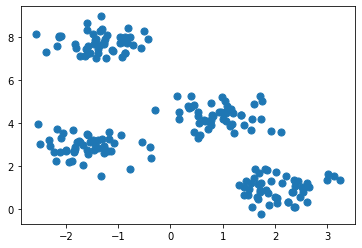

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 200, centers=4, cluster_std = 0.5, random_state = 0)
plt.scatter(X[:, 0], X[:, 1], s=50)